# Data Wrangling

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

path=r"D:\User\UdemyProyectos\python-ml-course\datasets"

In [7]:
path_data=r"customer-churn-model\Tab Customer Churn Model.txt"
data=pd.read_csv(os.path.join(path,path_data),sep='\t')
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
areaCode=data["Area Code"]
areaCode.head()

0    415
1    415
2    415
3    408
4    415
Name: Area Code, dtype: int64

### Indexacion Elegante

In [4]:
columns=['Phone','Day Calls']
info=data[columns]
info.head()

,Phone,Day Calls
0,382-4657,110
1,371-7191,123
2,358-1921,114
3,375-9999,71
4,330-6626,113


### Subconjunto de filas con condiciones

In [6]:
filt=data.iloc[:21,:10]
filt.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34


In [9]:
data.columns


Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [34]:
data_group=data.groupby('State')['Phone'].count()
data_group.head()

State
AK    52
AL    80
AR    55
AZ    64
CA    34
Name: Phone, dtype: int64

### Generacion aleatoria de numeros

In [37]:
#podemos usar
values=[12,34,45,67,78,354,34,56,4]
np.random.shuffle(values) #para obtener una lsita mezaclada aleatoriamente
np.random.choice(values) #obtenr un valor aleatorio
np.random.randint(1,3,size=(2,4)) #obtiene valores enteros aleatorios segun un rango especificado y la dimension de igual manera
np.random.random()

0.4593038039883438

#### Obtener la semilla

In [3]:
np.random.seed(2020)
for e in range(5):
    np.random.random()

### Conjunto de ordenamiento y Testing

In [4]:
len(data)

3333

(array([  8.,  56., 247., 613., 900., 811., 447., 189.,  55.,   7.]),
 array([-3.30001891, -2.61931284, -1.93860678, -1.25790072, -0.57719466,
         0.1035114 ,  0.78421746,  1.46492352,  2.14562958,  2.82633564,
         3.5070417 ]),
 <a list of 10 Patch objects>)

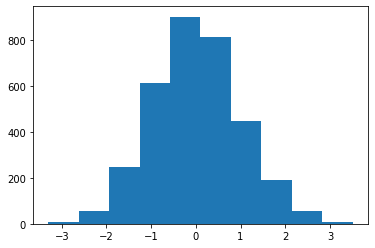

In [5]:
a=np.random.randn(len(data))
plt.hist(a)

(array([  2.,  14.,  26.,  86., 186., 334., 459., 547., 540., 452.]),
 array([-3.30001891, -2.89009252, -2.48016613, -2.07023974, -1.66031334,
        -1.25038695, -0.84046056, -0.43053417, -0.02060778,  0.38931861,
         0.799245  ]),
 <a list of 10 Patch objects>)

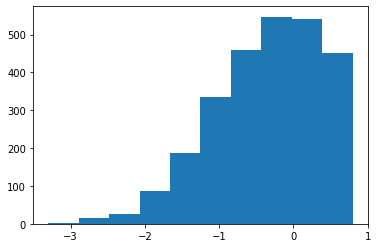

In [6]:
plt.hist(a[a<0.8])

In [7]:
check=a<0.8

In [12]:
training=check.sum()
training

2646

In [16]:
testing=(~check).sum()
testing

687

### Usando la libreria Sklearn

In [10]:
from sklearn.cross_validation import train_test_split

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [ ]:
train,test=train_test_split(data,test_size=0.2)
print("Entrenamiento ({})\n Testing ({})".format(len(train),len(test)))


### Usando una funcion Shuffle

In [8]:
import sklearn

In [9]:
sklearn.utils.shuffle(data)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
2199,WA,110,415,418-1775,no,no,0,241.2,105,41.00,...,85,14.82,245.3,59,11.04,8.5,4,2.30,2,False.
2724,NJ,182,415,418-8568,no,no,0,279.1,124,47.45,...,108,15.34,217.5,104,9.79,9.5,11,2.57,2,True.
1719,AZ,100,415,333-2337,no,no,0,188.5,152,32.05,...,115,12.61,179.8,88,8.09,15.2,5,4.10,2,False.
705,HI,99,415,346-2530,no,no,0,62.9,81,10.69,...,64,19.64,168.9,121,7.60,8.5,5,2.30,1,False.
2960,TX,1,415,396-4254,no,no,0,182.1,106,30.96,...,106,11.47,152.3,75,6.85,10.0,3,2.70,5,True.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,LA,151,408,401-3926,no,no,0,178.7,116,30.38,...,138,24.83,265.9,101,11.97,9.8,4,2.65,0,False.
1259,NH,55,408,373-7690,no,yes,20,189.3,95,32.18,...,113,10.08,250.2,102,11.26,12.5,4,3.38,2,False.
1669,MS,17,408,391-6709,no,yes,35,198.5,123,33.75,...,74,23.00,209.9,130,9.45,8.1,10,2.19,1,False.
3239,SD,87,415,330-1627,no,yes,33,125.0,99,21.25,...,81,20.00,215.3,95,9.69,10.2,7,2.75,2,False.
